In [79]:


%matplotlib inline
# DEPENDENCIES AND SETUP 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# FILES TO LOAD
# Define csv paths
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# READ THE CITY AND RIDE DATA
# "csv reader" read both files
city_read = pd.read_csv(city_data_to_load)
ride_read = pd.read_csv(ride_data_to_load)


# CREATE DATAFRAME FOR BOTH FILES
city_df = pd.DataFrame(city_read)
city_df
ride_df = pd.DataFrame(ride_read)
ride_df


# COMBINE THE DATA INTO A SINGLE DATASET
# The LEFT JOIN keyword returns all records from the left table (ride_df) 
# And the matched records from the right table (city_df) 
# The result is NULL from the right side, if there is no match
# Merging the two DataFrames into a Single DataFrame
merge_df = pd.merge(ride_df, city_df, on="city", how="left")




# DISPLAY THE DATA TABLE ("merge_df") FOR PREVIEW
# Head display five rows by default
merge_df.head()
#merge_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [80]:
# SORTING DATAFRAME ("merge_df")


# Sorting the above DataFrame ("merge_df") based on "city" column
# Will sort in the ascending order if no other parameter is passed
# If you want to sort in the descending order, pass parameter "ascending=False"

merge_df_sorted = merge_df.sort_values("city", ascending=True)
#merge_df_sorted
#merge_df_sorted.head()



In [81]:
# REINDEX DATAFRAME ("merge_df_sorted")


# Reindex the above DataFrame for clarity and organization
# The index can be reset to provide index numbers based on the new rankings
# "drop=True" is for removing the old index

merge_df_reindexed = merge_df_sorted.reset_index(drop=True)
#merge_df_reindexed
#merge_df_reindexed.head()



In [82]:
# DO A GROUP BY ON DATAFRAME ("merge_df_reindexed") 


# Group by column "city"
City_Grouped = merge_df_reindexed.groupby("city")
#City_Grouped.head()



In [83]:
# OBTAIN THE X AND Y COORDINATES FOR EACH OF THE THREE CITY TYPES



# Calculate "Average Fare ($) Per City" 
Average_Fare_Per_City = City_Grouped.mean()["fare"]
Average_Fare_Per_City

# Calculate "Total Number of Rides Per City"
Total_Number_Of_Rides_Per_City = City_Grouped["ride_id"].count()
Total_Number_Of_Rides_Per_City

# Calculate "Total Number of Drivers Per City"
Total_Number_Of_Drivers_Per_City = City_Grouped.mean()["driver_count"]
Total_Number_Of_Drivers_Per_City

# City Type (Urban, Suburban, Rural)
City_Type = city_df.set_index("city")["type"]
City_Type





# Create DataFrame ("City_Data") to hold the above results

City_Data = pd.DataFrame({"Average Fare(Per City)": Average_Fare_Per_City,
                          "Total Number of Rides(Per City)": Total_Number_Of_Rides_Per_City,
                          "Total Number of Drivers (Per City)": Total_Number_Of_Drivers_Per_City,
                          "City Type": City_Type})


City_Data



# Sorting the above DataFrame ("City_Data")
City_Data_Sort = City_Data.sort_values("Total Number of Drivers (Per City)", ascending = False)
#City_Data_Sort
#City_Data_Sort.head()




In [84]:
# CITY CATEGORIES

Urban = City_Data_Sort[City_Data_Sort["City Type"] == "Urban"]
#Urban
#Urban.head()
Suburban = City_Data_Sort[City_Data_Sort["City Type"] == "Suburban"]
#Suburban
#Suburban.head()
Rural = City_Data_Sort[City_Data_Sort["City Type"] == "Rural"]
#Rural
#Rural.head()



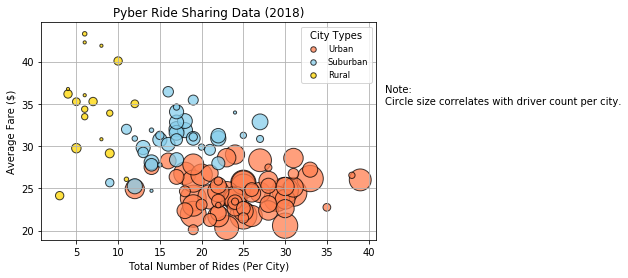

In [85]:
# BUILD THE SCATTER PLOTS FOR EACH CITY TYPES



# plt.scatter(x, y, s=area, c=colors, alpha=0.75)
# Area or Marker size(s) is multiplying with 10 to give clarity to the figure and to resemble the sample output.


plt.scatter(Urban["Total Number of Rides(Per City)"],
            Urban["Average Fare(Per City)"],
            s = Urban["Total Number of Drivers (Per City)"]*10,
            color="coral", edgecolor="black",
            label="Urban", alpha =.75, linewidths=1)

plt.scatter(Suburban["Total Number of Rides(Per City)"],
            Suburban["Average Fare(Per City)"],
            s = Suburban["Total Number of Drivers (Per City)"]*10,
            color="skyblue", edgecolor="black",
            label="Suburban", alpha=.75, linewidths=1)

plt.scatter(Rural["Total Number of Rides(Per City)"],
            Rural["Average Fare(Per City)"], 
            s = Rural["Total Number of Drivers (Per City)"]*10,
            color="gold", edgecolor="black", 
            label="Rural", alpha=.75, linewidths=1)




# PRINT SCATTER PLOT
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")



# CREATE GRID
#plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.grid(True)



# CREATE LEGEND 
#Legend = plt.legend( title="City Types", frameon=True, edgecolor="black")
Legend=plt.legend(title="City Types", loc="upper right", fontsize="small", scatterpoints=1, markerscale=True)

Legend.legendHandles[0]._sizes = [30]
Legend.legendHandles[1]._sizes = [30]
Legend.legendHandles[2]._sizes = [30]



# INCORPORATING A TEXT LABEL REGARDING CIRCLE SIZE
plt.text(42,36.4,"Note:")
plt.text(42,35,"Circle size correlates with driver count per city.")


# SAVE FIGURE
plt.savefig("output/Bubble_Plot.png", bbox_inches="tight")

# SHOW PLOT
plt.show()


           

## Total Fares by City Type

In [86]:
# GROUP BASED ON CITY TYPE


# Group types
Type_Grouped = merge_df.groupby("type")["type", "fare", "ride_id", "driver_count"]
#Type_Grouped.head()


In [88]:
# CALCULATE FARES PERCENTS BY CITY TYPE

# % of Total Fares by City Type
Fare_Sum= Type_Grouped.sum()["fare"]
#Fare_Sum


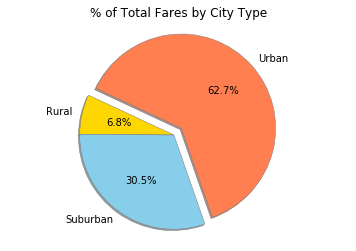

In [89]:
# BUILD PIE CHART 


plt.pie(Fare_Sum, startangle=155, radius=1.4,
        colors=["gold","skyblue","coral"], explode=[0,0,0.15],
        labels=["Rural","Suburban","Urban"], labeldistance=1.1,
        autopct="%1.1f%%", shadow=True,
        wedgeprops={"linewidth": 0.5, "edgecolor": "grey"})


plt.title("% of Total Fares by City Type")
plt.axis("equal")

# SAVE FIGURE 
plt.savefig("output/Total_Fare_by_City.png", bbox_inches="tight")

# SHOW FIGURE
plt.show()



## Total Rides by City Type

In [91]:
#CALCULATE RIDE PERCENTS BY CITY TYPE


Ride_Sum = Type_Grouped.count()["ride_id"]
#Ride_Sum



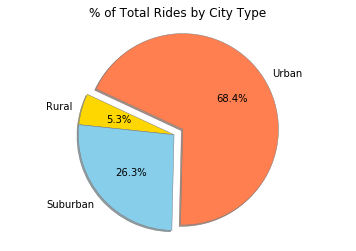

In [92]:

# BUILD PIE CHART


plt.pie(Ride_Sum, startangle=155, radius=1.4,
         colors=["gold","skyblue","coral"], explode=[0,0,0.15],
         labels=["Rural","Suburban","Urban"], labeldistance=1.1,
         autopct="%1.1f%%", shadow=True,
        wedgeprops={"linewidth": 0.5, "edgecolor": "grey"})

        
plt.title("% of Total Rides by City Type")
plt.axis("equal")


# SAVE FIGURE
plt.savefig("output/Total_Ride_by_City.png", bbox_inches="tight")


# SHOW FIGURE
plt.show()



## Total Drivers by City Type

In [95]:
# CALCULATE DRIVER PERCENTS
# Calculating driver count per city type from city_data data frame
Driver_Sum = city_df.groupby('type').sum()['driver_count']
#Driver_Sum


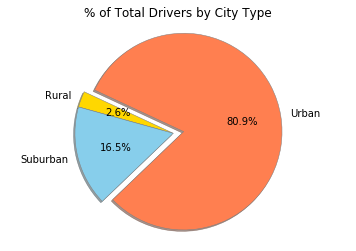

In [96]:

# BUILD PIE CHART

plt.pie(Driver_Sum, startangle=155, radius=1.4,
        colors=["gold","skyblue","coral"], explode=[0,0,0.15],
        labels=["Rural","Suburban","Urban"], labeldistance=1.1,
        autopct="%1.1f%%", shadow=True,
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'grey'})


plt.title('% of Total Drivers by City Type')
plt.axis('equal')


# SAVE FIGURE
plt.savefig("output/Total_Drivers_by_City.png", bbox_inches="tight")

# SHOW FIGURE
plt.show()





## Data Analysis Based On Pyber




The fictional ride sharing company "Pyber" currently has a presence in Urban, Suburban and Rural areas; however, the market share in each region is unequal. The Pyber data contains information on drivers and rides, including additional details like city, driver count, individual fares, and city type. The Observable Trends based on the analysis:





The majority of the revenue comes from Urban customers, with 62.7%. However at 30.5% Suburban customers still account for a significant portion and Rural customers with a minimal portion of less than 7%.


The Urban Cities have highest "Number of Rides", highest "Number of Drivers" but lowest "Average Fare" comparing to Suburban and Rural City Types. This is expected because the large population in Urban areas generally uses shorter but frequent rides compared to longer less frequent rides in Rural areas. 


The Low "Average Fare" in Urban area could be related to the highest "Number of Drivers", approx 81%. Higher competition among the drivers in Urban areas could be the result of lower fares while drivers in Rural and Suburban areas could charge more becuase of lesser "Number of Drivers". 


Pyber company have an opertunity to expand business in Rural and Suburban areas by allocating more drivers and by introducing reduced fares and offers to attract new customers which would help to gradually increase customer base in these areas. 




